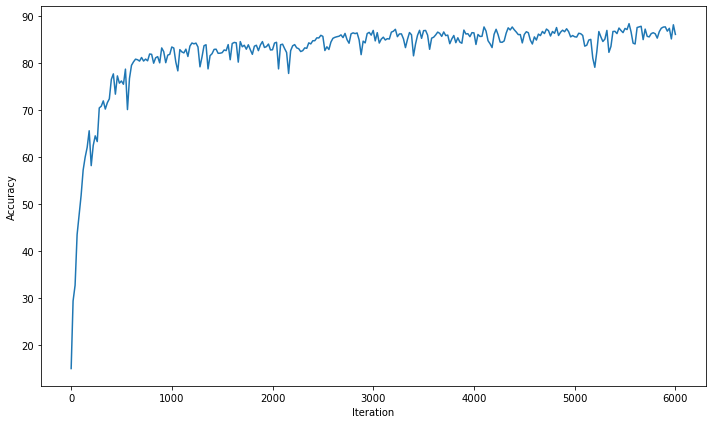

In [1]:
#1

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat


def softmax_forward(vector):
    exps = np.exp(vector) 
    temp = np.sum(exps, axis=1).reshape(-1, 1) 
    out = exps / temp

    return out


def onehot_encoding(data):
    onehot_list = []
    
    for i in data:
        for item in i:
            onehot_list.append(item)

    matrix_size = 10
    onehot_matrix = np.eye(matrix_size)[onehot_list]

    return onehot_matrix


def cross_entropy(x, y):
    softmax = softmax_forward(x)
    labels = y.shape[0]

    logresult = -np.log(softmax[range(labels), y])
    entropy_loss = np.sum(logresult) / labels

    return entropy_loss


class NN:
    def __init__(self, x, output_size):
        self.loss = None
        self.input_size = x.shape[1]
        self.output_size = output_size
        self.output = np.zeros(self.output_size)
        self.weight = (np.random.rand(self.input_size, self.output_size)) #weight은 random하게
        self.learning_rate = 0.01

    def forward(self, x_data):
        WtX = np.dot(x_data, self.weight)
        self.output = softmax_forward(WtX)
        
        return self.output 

    def backward(self, labels, x_data):
        onehot_labels = onehot_encoding(labels)

        dLdZ = self.output - onehot_labels

        for i in range(dLdZ.shape[1]):
            dLdW_pre = np.multiply(dLdZ[:,i].reshape(-1, 1), x_data)
            temp = np.sum(dLdW_pre, axis=0)

            if i==0:
                dLdW = temp
            else:
                dLdW = np.vstack((dLdW, temp))
        
        dLdW = np.transpose(dLdW)

        self.weight = self.weight - self.learning_rate* dLdW

        return self.weight
            


def main():
    # loading the data
    M = loadmat('MNIST_digit_data.mat')

    images_train = M['images_train']
    labels_train = M['labels_train']
    images_test = M['images_test']
    labels_test = M['labels_test']

    # just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]
    

    BATCH_SIZE = 10    
    iterations = len(images_train)//BATCH_SIZE
    NNlayer = NN(x=images_train, output_size=10)

    x_plot = []
    y_plot = []
    
    count=0
    for flagpoint in range(iterations):
        batch_X = images_train[flagpoint:flagpoint+BATCH_SIZE]
        batch_Y = labels_train[flagpoint:flagpoint+BATCH_SIZE]

        predict_result = NNlayer.forward(x_data=batch_X)
        backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)
        
        predict_label = np.argmax(predict_result, axis=1)

        if (count+1)%20 == 0 or count==0:
            test_X = images_test
            test_Y = labels_test

            test_forward = NNlayer.forward(x_data=test_X)   #softmax 결과값
            test_label = np.argmax(test_forward, axis=1)    #예측결과
            acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        
            
            x_plot.append(count)
            y_plot.append(acc)
  
        flagpoint += BATCH_SIZE
        count+=1



    plt.figure(figsize=(10,6))
    plt.plot(x_plot, y_plot)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

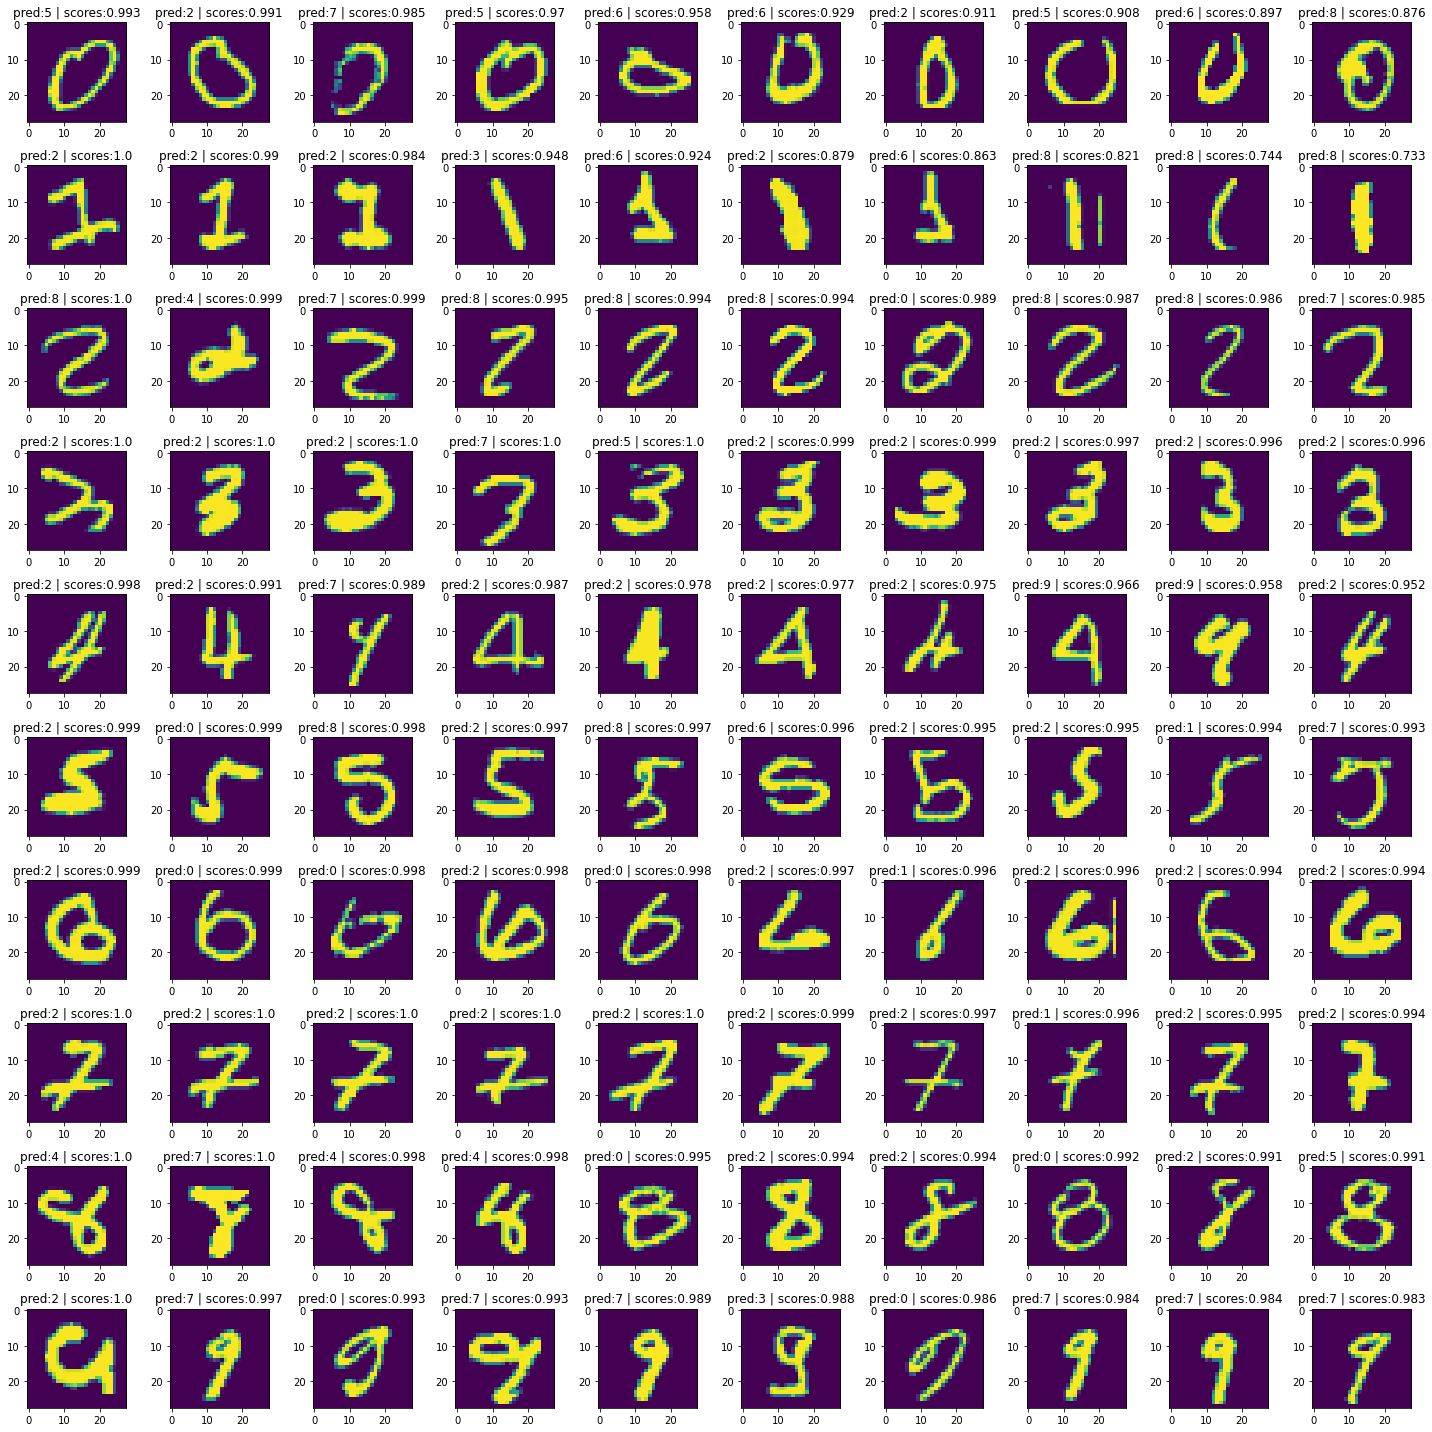

In [2]:
#2

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat


def softmax_forward(vector):
    exps = np.exp(vector) 
    temp = np.sum(exps, axis=1).reshape(-1, 1) 
    out = exps / temp

    return out



def onehot_encoding(data):
    onehot_list = []
    
    for i in data:
        for item in i:
            onehot_list.append(item)

    matrix_size = 10
    onehot_matrix = np.eye(matrix_size)[onehot_list]

    return onehot_matrix


def cross_entropy(x, y):
    softmax = softmax_forward(x)
    labels = y.shape[0]

    logresult = -np.log(softmax[range(labels), y])
    entropy_loss = np.sum(logresult) / labels

    return entropy_loss



def display_images(images, titles, rows, cols):
    figure, ax = plt.subplots(rows, cols, figsize=(20,20)) # array of axes
    
    for idx, img in enumerate(images): # images is a list
        ax.ravel()[idx].imshow(img)
        ax.ravel()[idx].set_title(titles[idx])

    plt.tight_layout()
    plt.show()


class NN:
    def __init__(self, x, output_size):
        self.loss = None
        self.input_size = x.shape[1]
        self.output_size = output_size
        self.output = np.zeros(self.output_size)
        self.weight = np.random.rand(self.input_size, self.output_size) #weight은 random하게
        self.learning_rate = 0.01

    def forward(self, x_data):
        WtX = np.dot(x_data, self.weight)
        self.output = softmax_forward(WtX)
        
        return self.output 

    def backward(self, labels, x_data):
        onehot_labels = onehot_encoding(labels)

        dLdZ = self.output - onehot_labels

        for i in range(dLdZ.shape[1]):
            dLdW_pre = np.multiply(dLdZ[:,i].reshape(-1, 1), x_data)
            temp = np.sum(dLdW_pre, axis=0)

            if i==0:
                dLdW = temp
            else:
                dLdW = np.vstack((dLdW, temp))
        
        dLdW = np.transpose(dLdW)

        self.weight = self.weight - self.learning_rate* dLdW

        return self.weight
            


def main():
    # loading the data
    M = loadmat('MNIST_digit_data.mat')

    images_train = M['images_train']
    labels_train = M['labels_train']
    images_test = M['images_test']
    labels_test = M['labels_test']

    # just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]


    BATCH_SIZE = 10    
    iterations = len(images_train)//BATCH_SIZE
    NNlayer = NN(x=images_train, output_size=10)

    x_plot = []
    y_plot = []
    
    count=0
    for flagpoint in range(iterations):
        batch_X = images_train[flagpoint:flagpoint+BATCH_SIZE]
        batch_Y = labels_train[flagpoint:flagpoint+BATCH_SIZE]

        predict_result = NNlayer.forward(x_data=batch_X)
        backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)
        
        predict_label = np.argmax(predict_result, axis=1)

        if (count+1)%20 == 0 or count==0:
            test_X = images_test
            test_Y = labels_test

            test_forward = NNlayer.forward(x_data=test_X)   #softmax 결과값
            test_label = np.argmax(test_forward, axis=1)    #예측결과
            acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        
            
            x_plot.append(count)
            y_plot.append(acc)
  
        flagpoint += BATCH_SIZE
        count+=1


    prediction_forward = NNlayer.forward(x_data=test_X)  #예측
    prediction = np.argmax(prediction_forward, axis=1).reshape(-1,1)  #predicted label
    
    images_result=[]
    for i in range(10):
        gt_index = np.where(test_Y==i)[0]    #ground truth == i인 애들의 index
        
        softmax_result = prediction_forward[gt_index]   #softmax
        predicted_result = prediction[gt_index].reshape(-1,1)    #예측 결과 값
        real_result = test_Y[gt_index].flatten().reshape(-1,1)   #실제 결과 값
        forimages = test_X[gt_index]

        wrong_index = np.where(predicted_result != real_result)[0]

        new_predicted_result = predicted_result[wrong_index].flatten()
        new_real_result = real_result[wrong_index].flatten()
        new_softmax_result = softmax_result[wrong_index]
        new_images = forimages[wrong_index]

        
        dict_new = {}
        for j in range(new_predicted_result.shape[0]):
            dict_new[j] = [new_predicted_result[j], new_real_result[j], new_softmax_result[j][new_predicted_result[j]], new_images[j]]

        
        top_ten = sorted(dict_new.items(), key=lambda item: item[1][2], reverse=True)[:10]
        
        for j in range(len(top_ten)):
            images_result.append(top_ten[j][1])
        
    
    
    images = []
    titles = []

    for i in range(100):
        images.append(images_result[i][3].reshape((28,28),order='F'))
        str_contents = str('pred:') + str(images_result[i][0]) + str(' | scores:') + str(round(images_result[i][2], 3))
        titles.append(str_contents)
        
            
    display_images(images, titles, 10, 10)


if __name__ == "__main__":
    main()

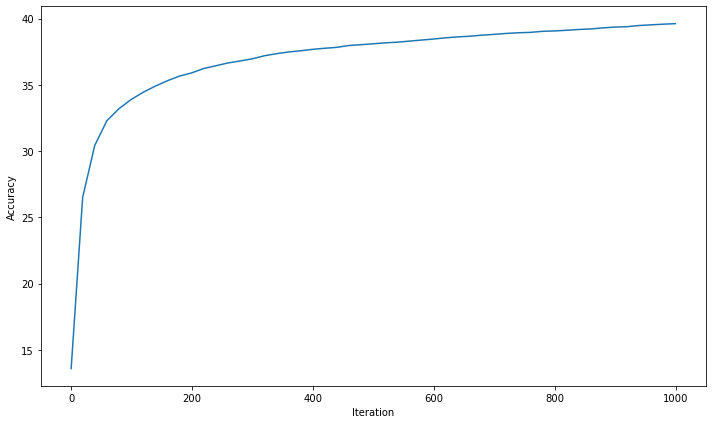

In [3]:
#3

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import random


def softmax_forward(vector):
    exps = np.exp(vector) 
    temp = np.sum(exps, axis=1).reshape(-1, 1) 
    out = exps / temp

    return out



def onehot_encoding(data):
    onehot_list = []
    
    for i in data:
        for item in i:
            onehot_list.append(item)

    matrix_size = 10
    onehot_matrix = np.eye(matrix_size)[onehot_list]

    return onehot_matrix


def cross_entropy(x, y):
    softmax = softmax_forward(x)
    labels = y.shape[0]

    logresult = -np.log(softmax[range(labels), y])
    entropy_loss = np.sum(logresult) / labels

    return entropy_loss



class NN:
    def __init__(self, x, output_size):
        self.loss = None
        self.input_size = x.shape[1]
        self.output_size = output_size
        self.output = np.zeros(self.output_size)
        self.weight = np.random.rand(self.input_size, self.output_size) 
        self.learning_rate = 0.01

    def forward(self, x_data):
        WtX = np.dot(x_data, self.weight)
        self.output = softmax_forward(WtX)
        
        return self.output 

    def backward(self, labels, x_data):
        onehot_labels = onehot_encoding(labels)

        dLdZ = self.output - onehot_labels

        for i in range(dLdZ.shape[1]):
            dLdW_pre = np.multiply(dLdZ[:,i].reshape(-1, 1), x_data)
            temp = np.sum(dLdW_pre, axis=0)

            if i==0:
                dLdW = temp
            else:
                dLdW = np.vstack((dLdW, temp))
        
        dLdW = np.transpose(dLdW)

        self.weight = self.weight - self.learning_rate* dLdW

        return self.weight
            


def main():
    # loading the data
    M = loadmat('MNIST_digit_data.mat')

    images_train = M['images_train']
    labels_train = M['labels_train']
    images_test = M['images_test']
    labels_test = M['labels_test']

    # just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]
    

    NNlayer = NN(x=images_train, output_size=10)

    x_plot = []
    y_plot = []

    index_new=[]   
    for i in range(10):
        images_index = np.where(labels_train == i)[0]

        index_new.append(random.choice(images_index))
  

    count=0
    for itter in range(1000):
        batch_X = images_train[index_new]
        batch_Y = labels_train[index_new]

        predict_result = NNlayer.forward(x_data=batch_X)
        backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)
        
        predict_label = np.argmax(predict_result, axis=1)
        
        if (count+1)%20 == 0 or count==0:
            test_X = images_test
            test_Y = labels_test

            test_forward = NNlayer.forward(x_data=test_X)   
            test_label = np.argmax(test_forward, axis=1)    
            acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        

            x_plot.append(count)
            y_plot.append(acc)
        
        count+=1
  

    plt.figure(figsize=(10,6))
    plt.plot(x_plot, y_plot)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

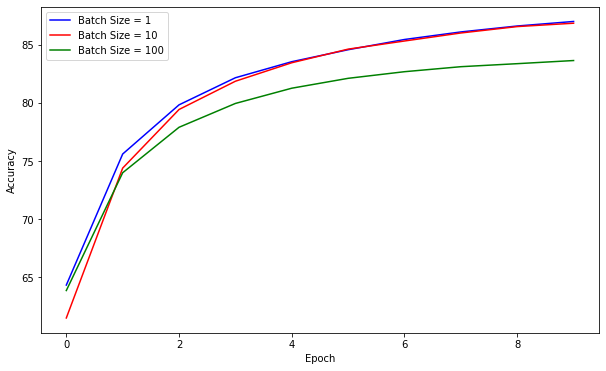

In [4]:
#4

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat


def softmax_forward(vector):
    exps = np.exp(vector) 
    temp = np.sum(exps, axis=1).reshape(-1, 1) 
    out = exps / temp

    return out




def onehot_encoding(data):
    onehot_list = []
    
    for i in data:
        for item in i:
            onehot_list.append(item)

    matrix_size = 10
    onehot_matrix = np.eye(matrix_size)[onehot_list]

    return onehot_matrix


def cross_entropy(x, y):
    softmax = softmax_forward(x)
    labels = y.shape[0]

    logresult = -np.log(softmax[range(labels), y])
    entropy_loss = np.sum(logresult) / labels

    return entropy_loss



class NN:
    def __init__(self, x, output_size):
        self.loss = None
        self.input_size = x.shape[1]
        self.output_size = output_size
        self.output = np.zeros(self.output_size)
        self.weight = np.random.rand(self.input_size, self.output_size) #weight은 random하게
        self.learning_rate = 0.0001

    def forward(self, x_data):
        x_data = x_data
        WtX = np.dot(x_data, self.weight)
        self.output = softmax_forward(WtX)
        
        return self.output 

    def backward(self, labels, x_data):
        onehot_labels = onehot_encoding(labels)

        dLdZ = self.output - onehot_labels

        for i in range(dLdZ.shape[1]):
            dLdW_pre = np.multiply(dLdZ[:,i].reshape(-1, 1), x_data)
            temp = np.sum(dLdW_pre, axis=0)

            if i==0:
                dLdW = temp
            else:
                dLdW = np.vstack((dLdW, temp))
        
        dLdW = np.transpose(dLdW)

        self.weight = self.weight - self.learning_rate* dLdW

        return self.weight
            



def main():
    # loading the data
    M = loadmat('MNIST_digit_data.mat')

    images_train = M['images_train']
    labels_train = M['labels_train']
    images_test = M['images_test']
    labels_test = M['labels_test']

    # just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]
    
    
    # iterations = len(images_train)//BATCH_SIZE
    count=0
    
    x_plot1 = []
    y_plot1 = []
        
    BATCH_SIZE1=1   
    NNlayer = NN(x=images_train, output_size=10)
    iterations = len(images_train)//BATCH_SIZE1     
    for epoch in range(10):
        for flagpoint in range(iterations):
            batch_X = images_train[flagpoint:flagpoint+BATCH_SIZE1]
            batch_Y = labels_train[flagpoint:flagpoint+BATCH_SIZE1]

            predict_result = NNlayer.forward(x_data=batch_X)
            backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)

            predict_label = np.argmax(predict_result, axis=1)


            flagpoint += BATCH_SIZE1

        
        test_X = images_test
        test_Y = labels_test

        test_forward = NNlayer.forward(x_data=test_X)   #softmax 결과값
        test_label = np.argmax(test_forward, axis=1)    #예측결과
        acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        

        x_plot1.append(epoch)
        y_plot1.append(acc)  
                    
                
    x_plot2 = []
    y_plot2 = []
    #batch size =10   
    BATCH_SIZE10=10
    NNlayer = NN(x=images_train, output_size=10)   
    iterations = len(images_train)//BATCH_SIZE10      
    for epoch in range(10):
        for flagpoint in range(iterations):
            batch_X = images_train[flagpoint:flagpoint+BATCH_SIZE10]
            batch_Y = labels_train[flagpoint:flagpoint+BATCH_SIZE10]

            predict_result = NNlayer.forward(x_data=batch_X)
            backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)

            predict_label = np.argmax(predict_result, axis=1)


            flagpoint += BATCH_SIZE10

        
        test_X = images_test
        test_Y = labels_test

        test_forward = NNlayer.forward(x_data=test_X)   #softmax 결과값
        test_label = np.argmax(test_forward, axis=1)    #예측결과
        acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        

        x_plot2.append(epoch)
        y_plot2.append(acc)


    x_plot3 = []
    y_plot3 = []
     #batch size =100   
    BATCH_SIZE100=100  
    NNlayer = NN(x=images_train, output_size=10)
    iterations = len(images_train)//BATCH_SIZE100       
    for epoch in range(10):
        for flagpoint in range(iterations):
            batch_X = images_train[flagpoint:flagpoint+BATCH_SIZE100]
            batch_Y = labels_train[flagpoint:flagpoint+BATCH_SIZE100]

            predict_result = NNlayer.forward(x_data=batch_X)
            backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)

            predict_label = np.argmax(predict_result, axis=1)


            flagpoint += BATCH_SIZE100

        
        test_X = images_test
        test_Y = labels_test

        test_forward = NNlayer.forward(x_data=test_X)   #softmax 결과값
        test_label = np.argmax(test_forward, axis=1)    #예측결과
        acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        

        x_plot3.append(epoch)
        y_plot3.append(acc)





    plt.figure(figsize=(10,6))
    plt.plot(x_plot1, y_plot1, markersize=3, color='blue', label='Batch Size = 1')
    plt.plot(x_plot2, y_plot2, markersize=3, color='red', label='Batch Size = 10')
    plt.plot(x_plot3, y_plot3, markersize=3, color='green', label='Batch Size = 100')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()




if __name__ == "__main__":
    main()

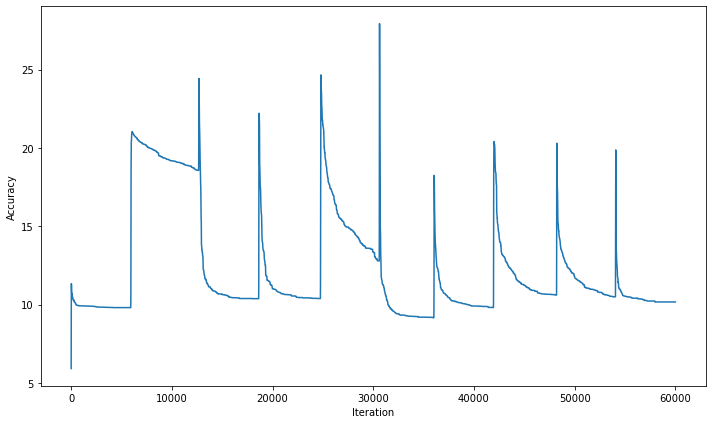

In [5]:
#5

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat


def softmax_forward(vector):
    exps = np.exp(vector) 
    temp = np.sum(exps, axis=1).reshape(-1, 1) 
    out = exps / temp

    return out



def onehot_encoding(data):
    onehot_list = []
    
    for i in data:
        for item in i:
            onehot_list.append(item)

    matrix_size = 10
    onehot_matrix = np.eye(matrix_size)[onehot_list]

    return onehot_matrix


def cross_entropy(x, y):
    softmax = softmax_forward(x)
    labels = y.shape[0]

    logresult = -np.log(softmax[range(labels), y])
    entropy_loss = np.sum(logresult) / labels

    return entropy_loss



class NN:
    def __init__(self, x, output_size):
        self.loss = None
        self.input_size = x.shape[1]
        self.output_size = output_size
        self.output = np.zeros(self.output_size)
        self.weight = np.random.rand(self.input_size, self.output_size) #weight은 random하게
        self.learning_rate = 0.01

    def forward(self, x_data):
        WtX = np.dot(x_data, self.weight)
        self.output = softmax_forward(WtX)
        
        return self.output 

    def backward(self, labels, x_data):
        onehot_labels = onehot_encoding(labels)

        dLdZ = self.output - onehot_labels

        for i in range(dLdZ.shape[1]):
            dLdW_pre = np.multiply(dLdZ[:,i].reshape(-1, 1), x_data)
            temp = np.sum(dLdW_pre, axis=0)

            if i==0:
                dLdW = temp
            else:
                dLdW = np.vstack((dLdW, temp))
        
        dLdW = np.transpose(dLdW)

        self.weight = self.weight - self.learning_rate* dLdW

        return self.weight
            



def main():
    # loading the data
    M = loadmat('MNIST_digit_data.mat')

    images_train = M['images_train']
    labels_train = M['labels_train']
    images_test = M['images_test']
    labels_test = M['labels_test']

    # just to make all random sequences on all computers the same.
    np.random.seed(1)


    dictdict = {}  
    for i in range(len(labels_train)):
        dictdict[i] = [labels_train[i], images_train[i]]

    sorted_dict = sorted(dictdict.items(), key=lambda item: item[1][0], reverse=False)
    
    images_train_new=[]
    labels_train_new=[]
    for i in range(len(labels_train)):  #sorting 완
        images_train_new.append(sorted_dict[i][1][1])
        labels_train_new.append(sorted_dict[i][1][0][0]) 
        
    
    images_train_new = np.array(images_train_new)
    labels_train_new = np.array(labels_train_new).reshape(-1,1)

    NNlayer = NN(x=images_train_new, output_size=10)
    BATCH_SIZE = 1    
    iterations = len(images_train_new)//BATCH_SIZE 

    x_plot = []
    y_plot = []
    
    count=0

    for flagpoint in range(iterations):       
        batch_X = images_train_new[flagpoint:flagpoint+BATCH_SIZE]
        batch_Y = labels_train_new[flagpoint:flagpoint+BATCH_SIZE]

        predict_result = NNlayer.forward(x_data=batch_X)
        backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)
        
        predict_label = np.argmax(predict_result, axis=1)
        
        if (count+1)%10 == 0 or count==0:
            test_X = images_test
            test_Y = labels_test

            test_forward = NNlayer.forward(x_data=test_X)   #softmax 결과값
            test_label = np.argmax(test_forward, axis=1)    #예측결과
            acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        

            x_plot.append(count)
            y_plot.append(acc)  

            
        flagpoint += BATCH_SIZE
        count+=1
        

    
    plt.figure(figsize=(10,6))
    plt.plot(x_plot, y_plot)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    main()

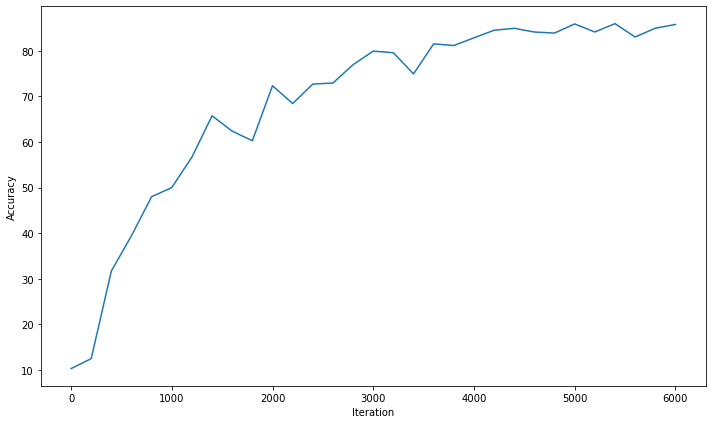

In [6]:
#Bonus

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat


def softmax_forward(vector):
    exps = np.exp(vector) 
    temp = np.sum(exps, axis=1).reshape(-1, 1) 
    out = exps / temp

    return out


def onehot_encoding(data):
    onehot_list = []
    
    for i in data:
        for item in i:
            onehot_list.append(item)

    matrix_size = 10
    onehot_matrix = np.eye(matrix_size)[onehot_list]

    return onehot_matrix


def cross_entropy(x, y):
    softmax = softmax_forward(x)
    labels = y.shape[0]

    logresult = -np.log(softmax[range(labels), y])
    entropy_loss = np.sum(logresult) / labels

    return entropy_loss



def forward_ReLU(data):
    return np.maximum(0, data)



class NN:
    def __init__(self, x, neuron_num, output_size):
        self.layer = []
        self.loss = None
        self.WtX = None
        self.forward_relu_result = None
        self.first_WtX = None
        self.second_WtX = None

        self.first_input_size = x.shape[1]
        self.first_output_size = neuron_num
        self.first_weight = np.random.rand(self.first_input_size, self.first_output_size) 

        self.second_input_size = self.first_weight.shape[1]
        self.second_output_size = output_size
        self.second_weight = np.random.rand(self.second_input_size, self.second_output_size)

        self.forward_result = np.zeros(self.second_output_size)
        self.learning_rate = 0.01
        

    def forward(self, x_data):
        x_data = x_data/784
        self.first_WtX = np.dot(x_data, self.first_weight)
        self.forward_relu_result = forward_ReLU(self.first_WtX) ## (10, 11)

        self.second_WtX = np.dot(self.forward_relu_result, self.second_weight)  ## (10, 10)
        self.forward_result = softmax_forward(self.second_WtX) ##(10, 10)
        
        
        return self.forward_result 


    def backward(self, labels, x_data):
        onehot_labels = onehot_encoding(labels)

        dLdZ2 = self.forward_result - onehot_labels #(10,10)

        for i in range(self.forward_relu_result.shape[0]): ## 10
            dLdW2_pre = np.multiply(dLdZ2[:, i].reshape(-1, 1), self.forward_relu_result) ## (10, 11)
            temp = np.sum(dLdW2_pre, axis=0) ## (1, 11)

            if i==0:
                dLdW2 = temp
            else:
                dLdW2 = np.vstack((dLdW2, temp)) ## (10, 11)
        
        dLdW2 = np.transpose(dLdW2) ## (11, 10)

        self.second_weight = self.second_weight - self.learning_rate * dLdW2


        syweight= np.dot(dLdZ2, np.transpose(self.second_weight)) # (10,11)
        da1dZ1 = (self.first_WtX>0)    #(10,11)
        
        
        for i in range(da1dZ1.shape[1]):##10
            dLdZ1i = np.multiply(syweight[:,i], da1dZ1[:,i]).reshape(-1, 1) ## (10, 1) (10,)

            dLdW1i = np.multiply(dLdZ1i, x_data)
            dLdW1i = np.sum(dLdW1i, axis=0)

            if i==0:
                dLdW1 = dLdW1i
            else:
                dLdW1 = np.vstack((dLdW1, dLdW1i))

        dLdW1 = dLdW1.transpose()

        self.first_weight = self.first_weight - self.learning_rate * dLdW1  #(784,11)

        


def main():
    # loading the data
    M = loadmat('MNIST_digit_data.mat')

    images_train = M['images_train']
    labels_train = M['labels_train']
    images_test = M['images_test']
    labels_test = M['labels_test']

    # just to make all random sequences on all computers the same.
    np.random.seed(1)

    # randomly permute data points
    inds = np.random.permutation(images_train.shape[0])
    images_train = images_train[inds]
    labels_train = labels_train[inds]

    inds = np.random.permutation(images_test.shape[0])
    images_test = images_test[inds]
    labels_test = labels_test[inds]
    
    NNlayer = NN(x=images_train, output_size=10, neuron_num=11)
    BATCH_SIZE = 10    
    iterations = len(images_train)//BATCH_SIZE



    x_plot = []
    y_plot = []
    
    count=0
    for flagpoint in range(iterations):
        batch_X = images_train[flagpoint:flagpoint+BATCH_SIZE]
        batch_Y = labels_train[flagpoint:flagpoint+BATCH_SIZE]

        predict_result = NNlayer.forward(x_data=batch_X)
        backward_ = NNlayer.backward(x_data=batch_X, labels=batch_Y)
        
        predict_label = np.argmax(predict_result, axis=1)
        

        if (count+1)%200 == 0 or count==0:
            test_X = images_test
            test_Y = labels_test

            test_forward = NNlayer.forward(x_data=test_X)   
            test_label = np.argmax(test_forward, axis=1)    
            acc = np.sum(test_label == test_Y.flatten()) / len(test_Y) * 100        

            x_plot.append(count)
            y_plot.append(acc)
  
        flagpoint += BATCH_SIZE
        count+=1
        

    plt.figure(figsize=(10,6))
    plt.plot(x_plot, y_plot)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()